In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


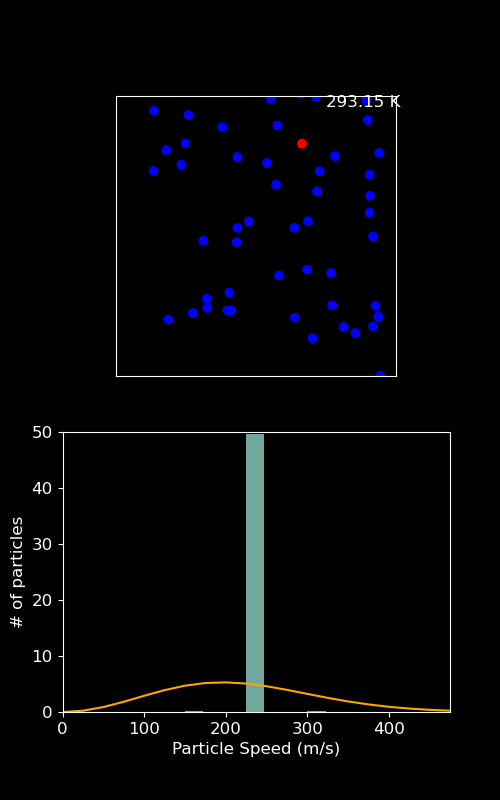

C:\Users\jingt_41vra31\AppData\Local\Temp\ipykernel_32216\1599731981.py:114: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0].astype(np.float)), (n_avg, 1))


In [3]:
%matplotlib notebook
# code from online

plt.style.use('dark_background')  # comment out for "light" theme
plt.rcParams["font.size"] = 12

np.random.seed(0)


class Particle():

    def __init__(self, id=0, r=np.zeros(2), v=np.zeros(2), R=1E-2, m=1, color="blue"):
        self.id, self.r, self.v, self.R, self.m, self.color = id, r, v, R, m, color


class Sim():

    X = 2
    Y = 2

    def __init__(self, dt=50E-6, Np=20):
        self.dt, self.Np = dt, Np
        self.particles = [Particle(i) for i in range(self.Np)]

    def collision_detection(self):
        ignore_list = []
        for particle1 in self.particles:
            if particle1 in ignore_list:
                continue
            x, y = particle1.r
            if ((x > self.X/2 - particle1.R) or (x < -self.X/2+particle1.R)):
                particle1.v[0] *= -1
            if ((y > self.Y/2 - particle1.R) or (y < -self.Y/2+particle1.R)):
                particle1.v[1] *= -1

            for particle2 in self.particles:
                if id(particle1) == id(particle2):
                    continue
                m1, m2, r1, r2, v1, v2 = particle1.m, particle2.m, particle1.r, particle2.r, particle1.v, particle2.v
                if np.dot(r1-r2, r1-r2) <= (particle1.R + particle2.R)**2:
                    v1_new = v1 - 2*m1 / \
                        (m1+m2) * np.dot(v1-v2, r1-r2) / \
                        np.dot(r1-r2, r1-r2)*(r1-r2)
                    v2_new = v2 - 2*m1 / \
                        (m1+m2) * np.dot(v2-v1, r2-r1) / \
                        np.dot(r2-r1, r2-r1)*(r2-r1)
                    particle1.v = v1_new
                    particle2.v = v2_new
                    ignore_list.append(particle2)

    def increment(self):
        self.collision_detection()
        for particle in self.particles:
            particle.r += self.dt * particle.v

    def particle_positions(self):
        return [particle.r for particle in self.particles]

    def particle_colors(self):
        return [particle.color for particle in self.particles]

    def particle_speeds(self):
        return [np.sqrt(np.dot(particle.v, particle.v)) for particle in self.particles]

    def E_avg(self):
        E_avg = 0
        for particle in self.particles:
            E_avg += 0.5*particle.m*np.dot(particle.v, particle.v)
        return E_avg/len(self.particles)

    def temperature(self):
        return self.E_avg()*(2/3)/1.380649E-23


# sim variables
Np = 50

m = 127*1.66E-27
T_init = 293.15

v_avg = np.sqrt(3/2*1.380649E-23*T_init*2/m)

sim = Sim(Np=Np)

for particle in sim.particles:
    particle.m = m
    particle.r = np.random.uniform(
        [-sim.X/2, -sim.Y/2], [sim.X/2, sim.Y/2], size=2)
    particle.v = v_avg * np.array([np.cos(np.pi/4), np.cos(np.pi/4)])

sim.particles[0].color = "red"


# plot code

n_avg = 100

fig, (ax, ax2) = plt.subplots(figsize=(5, 8), nrows=2)
ax.set_xticks([]), ax.set_yticks([])
ax.set_aspect("equal")

vs = np.arange(0, 500, 25)

scatter = ax.scatter([], [])
bar = ax2.bar(vs, [0]*len(vs), width=0.9 *
              np.gradient(vs), align="edge", alpha=0.8)

theo = ax2.plot(vs, 25*Np*(m/(2*np.pi*1.380649E-23*sim.temperature()))**(3/2) * 4 *
                np.pi*vs**2 * np.exp(-m*vs**2/(2*1.380649E-23*sim.temperature())), color="orange")

T_txt = ax.text(sim.X/2*0.5, sim.Y/2*0.92, s="")

freqs_matrix = np.tile((np.histogram(sim.particle_speeds(), bins=vs)[
                       0].astype(np.float)), (n_avg, 1))


def init():
    ax.set_xlim(-sim.X/2, sim.X/2)
    ax.set_ylim(-sim.Y/2, sim.Y/2)
    ax2.set_xlim(vs[0], vs[-1])
    ax2.set_ylim(0, Np)
    ax2.set(xlabel="Particle Speed (m/s)", ylabel="# of particles")
    return (scatter, *bar.patches)


def update(frame):
    sim.increment()

    T_txt.set_text(f"{sim.temperature():.2f} K")

    freqs, bins = np.histogram(sim.particle_speeds(), bins=vs)
    freqs_matrix[frame % n_avg] = freqs
    freqs_mean = np.mean(freqs_matrix, axis=0)
    freqs_max = np.max(freqs_mean)

    for rect, height in zip(bar.patches, freqs_mean):
        rect.set_height(height)

    if np.abs(freqs_max - ax2.get_ylim()[1]) > 10:
        ax2.set_ylim(0, 5 + ax2.get_ylim()
                     [1] + (freqs_max - ax2.get_ylim()[1]))
        fig.canvas.draw()

    scatter.set_offsets(np.array(sim.particle_positions()))
    scatter.set_color(sim.particle_colors())
    return (scatter, *bar.patches, T_txt)


ani = FuncAnimation(fig, update, frames=range(
    2400), init_func=init, blit=True, interval=1/30, repeat=False)

<IPython.core.display.Javascript object>


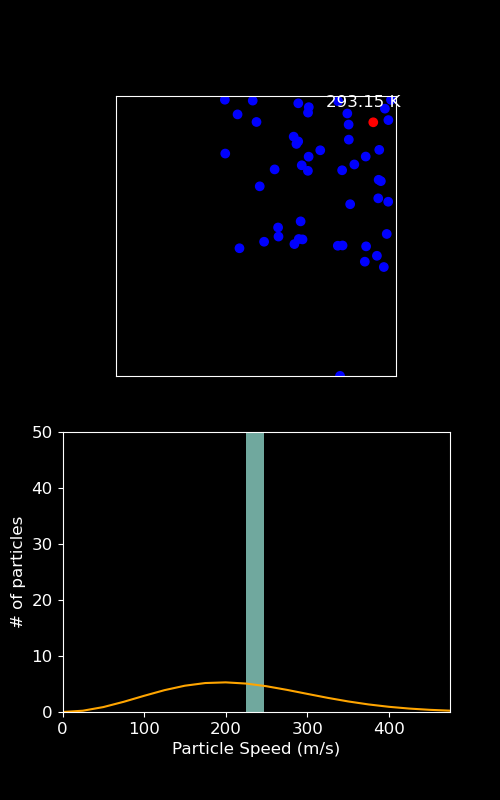

C:\Users\jingt_41vra31\AppData\Local\Temp\ipykernel_32216\2780155021.py:114: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0].astype(np.float)), (n_avg, 1))


In [4]:
%matplotlib notebook
# no collision between particles

plt.style.use('dark_background')  # comment out for "light" theme
plt.rcParams["font.size"] = 12

np.random.seed(0)


class Particle():

    def __init__(self, id=0, r=np.zeros(2), v=np.zeros(2), R=1E-2, m=1, color="blue"):
        self.id, self.r, self.v, self.R, self.m, self.color = id, r, v, R, m, color


class Sim():

    X = 2
    Y = 2

    def __init__(self, dt=50E-6, Np=20):
        self.dt, self.Np = dt, Np
        self.particles = [Particle(i) for i in range(self.Np)]

    def collision_detection(self):
        ignore_list = []
        for particle1 in self.particles:
            if particle1 in ignore_list:
                continue
            x, y = particle1.r
            if ((x > self.X/2 - particle1.R) or (x < -self.X/2+particle1.R)):
                particle1.v[0] *= -1
            if ((y > self.Y/2 - particle1.R) or (y < -self.Y/2+particle1.R)):
                particle1.v[1] *= -1

#             for particle2 in self.particles:
#                 if id(particle1) == id(particle2):
#                     continue
#                 m1, m2, r1, r2, v1, v2 = particle1.m, particle2.m, particle1.r, particle2.r, particle1.v, particle2.v
#                 if np.dot(r1-r2, r1-r2) <= (particle1.R + particle2.R)**2:
#                     v1_new = v1 - 2*m1 / \
#                         (m1+m2) * np.dot(v1-v2, r1-r2) / \
#                         np.dot(r1-r2, r1-r2)*(r1-r2)
#                     v2_new = v2 - 2*m1 / \
#                         (m1+m2) * np.dot(v2-v1, r2-r1) / \
#                         np.dot(r2-r1, r2-r1)*(r2-r1)
#                     particle1.v = v1_new
#                     particle2.v = v2_new
#                     ignore_list.append(particle2)

    def increment(self):
        self.collision_detection()
        for particle in self.particles:
            particle.r += self.dt * particle.v

    def particle_positions(self):
        return [particle.r for particle in self.particles]

    def particle_colors(self):
        return [particle.color for particle in self.particles]

    def particle_speeds(self):
        return [np.sqrt(np.dot(particle.v, particle.v)) for particle in self.particles]

    def E_avg(self):
        E_avg = 0
        for particle in self.particles:
            E_avg += 0.5*particle.m*np.dot(particle.v, particle.v)
        return E_avg/len(self.particles)

    def temperature(self):
        return self.E_avg()*(2/3)/1.380649E-23


# sim variables
Np = 50

m = 127*1.66E-27
T_init = 293.15

v_avg = np.sqrt(3/2*1.380649E-23*T_init*2/m)

sim = Sim(Np=Np)

for particle in sim.particles:
    particle.m = m
    particle.r = np.random.uniform(
        [-sim.X/2, -sim.Y/2], [sim.X/2, sim.Y/2], size=2)
    particle.v = v_avg * np.array([np.cos(np.pi/4), np.cos(np.pi/4)])

sim.particles[0].color = "red"


# plot code

n_avg = 100

fig, (ax, ax2) = plt.subplots(figsize=(5, 8), nrows=2)
ax.set_xticks([]), ax.set_yticks([])
ax.set_aspect("equal")

vs = np.arange(0, 500, 25)

scatter = ax.scatter([], [])
bar = ax2.bar(vs, [0]*len(vs), width=0.9 *
              np.gradient(vs), align="edge", alpha=0.8)

theo = ax2.plot(vs, 25*Np*(m/(2*np.pi*1.380649E-23*sim.temperature()))**(3/2) * 4 *
                np.pi*vs**2 * np.exp(-m*vs**2/(2*1.380649E-23*sim.temperature())), color="orange")

T_txt = ax.text(sim.X/2*0.5, sim.Y/2*0.92, s="")

freqs_matrix = np.tile((np.histogram(sim.particle_speeds(), bins=vs)[
                       0].astype(np.float)), (n_avg, 1))


def init():
    ax.set_xlim(-sim.X/2, sim.X/2)
    ax.set_ylim(-sim.Y/2, sim.Y/2)
    ax2.set_xlim(vs[0], vs[-1])
    ax2.set_ylim(0, Np)
    ax2.set(xlabel="Particle Speed (m/s)", ylabel="# of particles")
    return (scatter, *bar.patches)


def update(frame):
    sim.increment()

    T_txt.set_text(f"{sim.temperature():.2f} K")

    freqs, bins = np.histogram(sim.particle_speeds(), bins=vs)
    freqs_matrix[frame % n_avg] = freqs
    freqs_mean = np.mean(freqs_matrix, axis=0)
    freqs_max = np.max(freqs_mean)

    for rect, height in zip(bar.patches, freqs_mean):
        rect.set_height(height)

    if np.abs(freqs_max - ax2.get_ylim()[1]) > 10:
        ax2.set_ylim(0, 5 + ax2.get_ylim()
                     [1] + (freqs_max - ax2.get_ylim()[1]))
        fig.canvas.draw()

    scatter.set_offsets(np.array(sim.particle_positions()))
    scatter.set_color(sim.particle_colors())
    return (scatter, *bar.patches, T_txt)


ani = FuncAnimation(fig, update, frames=range(
    2400), init_func=init, blit=True, interval=1/30, repeat=False)